In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
user_bus_final = pd.read_csv('../../user_bus_final.csv', index_col = 0, low_memory = False)

In [3]:
business_data = pd.read_csv('../Business_Related/julia_business_data.csv', index_col = 0, low_memory = False)

In [4]:
business_data.columns

Index(['name', 'address', 'city', 'state', 'latitude', 'longitude', 'stars',
       'review_count', 'categories', 'is_American', 'is_Dessert', 'is_Bar',
       'is_Beer,Wine,Spirits', 'is_Breakfast', 'is_Coffee & Tea', 'is_Asian',
       'is_Italian', 'is_Healthy,Specialty Food', 'is_Latin American',
       'is_Mediterranean', 'is_Western European', 'is_Slavic Food',
       'is_African', 'is_Food Markets/Shops'],
      dtype='object')

In [6]:
temp = pd.read_csv('../../user_features.csv', index_col = 0, low_memory = False)

(array([26., 10.,  2.,  2.,  1.,  3.,  3.,  1.,  1.,  1.]),
 array([ 30. ,  49.6,  69.2,  88.8, 108.4, 128. , 147.6, 167.2, 186.8,
        206.4, 226. ]),
 <BarContainer object of 10 artists>)

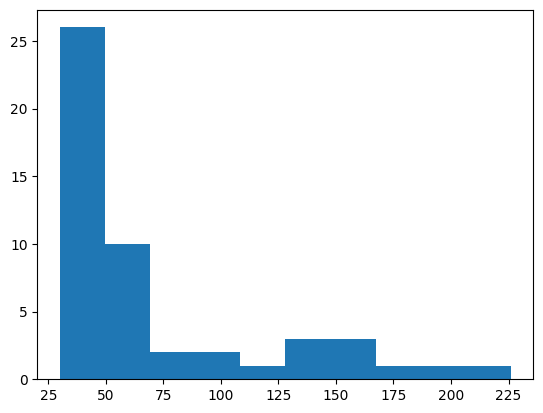

In [38]:
random_users = np.random.choice(temp[temp['num_businesses'] >= 30].index, 50)
plt.hist(temp.loc[random_users]['num_businesses'])

(array([5513., 2278., 1092.,  573.,  372.,  250.,  153.,   80.,   65.,
          65.]),
 array([ 30.,  47.,  64.,  81.,  98., 115., 132., 149., 166., 183., 200.]),
 <BarContainer object of 10 artists>)

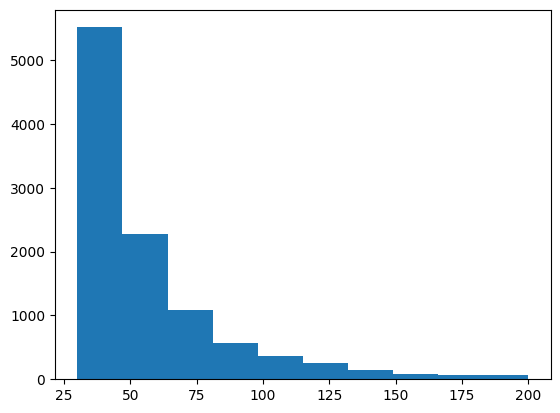

In [35]:
plt.hist(temp[(temp['num_businesses'] >= 30).multiply(temp['num_businesses'] <= 200)]['num_businesses'])

In [42]:
selected_users = user_bus_final.loc[random_users]

In [60]:
def make_user_csvs(row):
    df = pd.DataFrame()
    for ranking in [1,2,3,4,5]:
        if row[str(ranking)]== row[str(ranking)]:
            buses =  eval(row[str(ranking)])
            for business in buses: 
                new_data = business_data.loc[business]
                new_data['rating'] = ranking
                df = pd.concat([df, new_data], axis = 1)
    df.transpose().to_csv(f'select_users/user_rf_{row.name}_{len(df.columns)}.csv')
    return row

In [61]:
selected_users.apply(make_user_csvs, axis = 1)

,1,2,3,4,5
user_id,,,,,
b'H1IZrCGg4XR4oHbGCdQQGg',NaN,"['FD7gMovIYQmhdn23Iq91zQ', 'sTPueJEwcRDj7ZJmG7...","['ELY0HI8GDEx0jkmREVna0A', 'GrRrxHK9dWgibvUpco...","['9ggTidLF9LPNdyWdCGtrYg', 'REiAM73RkOxFqCVlEF...","['5Fm6khB-De-OdqATep9J9Q', 'WMkiheTT-8kRslImVL..."
b'l-mrwsKKtzzyj_FAtIDiTg',"['E6XroNxiqhu5lTBRNyd69g', 'i4ttU3qq_F30WCfzh3...","['rAe-1HU5Z-DuUXEbzASXDA', 'tdXYmpPzMuBzm9bN46...",['nwVZnjRDhUrFo1kGahLIZQ'],"['5uHqdix18wYakIps4lM6Ow', 'LsqrLBwo4-VGuwATGA...","['nXx6nOAqC0DqVCUObuUsMA', 'n4GDJsQAyBrcWduMjc..."
b'M2NS_aQbMY2apoYjTlOCng',"['qibDo7L7chTUKMMaMsXKzg', 'uLM1kVK3-gYuUYkgnC...","['WD4pr7n-gqcYlyluI3J-Vw', 'l86c7xYxAIztpGILAd...","['bzvxt0sP9OMwwks1vLSzKw', 'yEVRdb-9sBqzRiPC5B...","['kvOorg6F1gnbPmlTtjunsg', '-8luB5pJ7d9UOoiF7w...","['K4I8PyxqI57ABlV_rn8PEQ', 'Ci_-QGpCm98DnSiFQU..."
b'P9vy8xdFeJ6-m7Lt5tQi1A',NaN,NaN,"['teFjQxUqT8c-yxQdoILDVQ', 'YafU-Kipt3QbHbHzny...","['9Ys1CvuL7GFwRdhudvWWfQ', '2z1kSiZIk16f1uSD7j...","['GXjN3c0swlIfH5kbVxATFQ', 'lJBYrLE3v3d2q5QBIK..."
b'ftiitD4ua2PbMsKfs43LRg',"['HYK6JACOzRHk2XHUjbyJ6A', 'syZwSaIJ-Hh6mQAu9J...","['5RN4m3XO66jK4ThoDX3VnA', 'AwmsqV6rXxBf8ycphK...","['KH9ghKDytIlUwlkEioqreg', '3YqUe2FTCQr0pPVK8o...","['MIjXkp8I_DWiCsC6lUeGdw', 'tIYd4pzWFlQasuX_Jm...","['dQUZyX2QDWuqi_-y-cEjMw', 'O1Cw2yzf4bCuKjbVTl..."
b'_i3uTqtUfyVZDryKzUGGiw',"['Iw8uqNPxviwcgxtruAx_LA', 'OdIBX09glfXNVSyd0R...","['T9nNz9-3mfNga0T0Nfzvsw', '1AQhRXA6GhMp6FjpS4...","['sNOzfwyTZDwKtMiTwjQobA', 'QY9h6QIaBFeExPGNPq...","['j-qtdD55OLfSqfsWuQTDJg', '1hFBAjRLIq82kz5R9k...","['1hFBAjRLIq82kz5R9kRxfw', 'wocwfwSFrNfYJRyfYS..."
b'9TuUABNmDhBqdDael0zy8w',"['DzD2cKBrS-qOfhT3ToXsLw', 'PjgQhtDdLHMR36l5yQ...","['rwO1Q2WYLh-rknIsG2qJZA', 'HiQwgtgkvkqJmZrCyF...","['EI-7c_Zpd9HhBiVywzkIBQ', 'NI96sBdkMf9mMWAomc...","['t-RHwZzlTAZeTcgrrbRtqg', 'iCKF72z3fqRTF1vxdB...","['ZeEk0ePOZZXgo7EMDZ0kAg', '_ab50qdWOk0DdB6XOr..."
b'-y-R9jOTso_XAjDOrabdFg',"['SybWgZ_qUaUmlmB97_Ia2A', 'w4fj_WNZpESDPf7hQx...","['jPqftT6V8XZ3zBSXGlhgqg', 'l86c7xYxAIztpGILAd...","['w_4xUt-1AyY2ZwKtnjW0Xg', 'P9ltq8KT6pgKjyZSKs...","['mabS8Eq8CLjMZdLl3V7GWA', 'vJeHUxMZEXiET3ucrt...",['OjHQumZ6nCh5vqzUbmkaNg']
b't5eNyh2FNtH2_rXfvJf0wA',NaN,"['LyNFIjzSpEWzmfN3Fk5f4w', 'vVfy055EfLMdd0yJYH...","['kbXpjBSweedxQ1WrlJ5i7Q', 'lML_PZePqlBBWpD1tq...","['_EwuYl6cv4td1Mud68U-qg', 'kQRB8RNwd7cEMcURTS...","['cNua7EAP7aoHTEp734VqWA', '-pyobEWdpZ6jUp42f3..."
